In [2]:
import pandas as pd
from math import sin, cos, asin, sqrt, pi
import matplotlib
import geopandas
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("water_main_breaks.csv")

In [3]:
df = df.sort_values("break_date",ignore_index = True)

In [4]:
df.head()

X          Y  OBJECTID  Cell_rotation  mslink  break_num  \
0 -89.401346  43.028086     59453            NaN     NaN    71879.0   
1 -89.305931  43.050511      2906      34.602315  3093.0      126.0   
2 -89.478313  43.060747      2907     359.603575  3094.0      127.0   
3 -89.305522  43.081169      2909      89.601976  3096.0      129.0   
4 -89.491482  43.068442      2911     359.603612  3098.0      131.0   

   pipe_mslink pipe_type              break_date  house_num  ... created_user  \
0          NaN      MAIN  1970/01/01 00:00:00+00        NaN  ...        WUJAG   
1      11967.0      MAIN  1970/01/01 00:00:00+00        NaN  ...          NaN   
2      22926.0      MAIN  1970/01/01 00:00:00+00        NaN  ...          NaN   
3      11228.0      MAIN  1970/01/01 00:00:00+00        NaN  ...          NaN   
4       9651.0      MAIN  1970/01/01 00:00:00+00        NaN  ...          NaN   

             created_date last_edited_user        last_edited_date BreakType  \
0  2020/09/25 17:03:21+00            WUJAG  2020/09/25 17:03:36+00       NaN   
1  1970/01/01 00:00:00+00              NaN  1970/01/01 00:00:00+00       NaN   
2  1970/01/01 00:00:00+00              NaN  1970/01/01 00:00:00+00       NaN   
3  1970/01/01 00:00:00+00              NaN  1970/01/01 00:00:00+00       NaN   
4  1970/01/01 00:00:00+00              NaN  1970/01/01 00:00:00+00       NaN   

  BreakTypeOther StreetSegmentID CWWOID          CWWOClosedDate  \
0            NaN             NaN    NaN  1970/01/01 00:00:00+00   
1            NaN          4230.0    NaN  1970/01/01 00:00:00+00   
2            NaN         10174.0    NaN  1970/01/01 00:00:00+00   
3            NaN          3795.0    NaN  1970/01/01 00:00:00+00   
4            NaN           502.0    NaN  1970/01/01 00:00:00+00   

   TotalHoursWaterOff  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  

[5 rows x 46 columns]

In [11]:
ms = geopandas.read_file("zip://Zoning_Districts-shp.zip")

In [6]:
x = df["X"].values
y = df["Y"].values

(-89.58776742567994, -89.23054231969978, 42.98945303094492, 43.180714182328316)

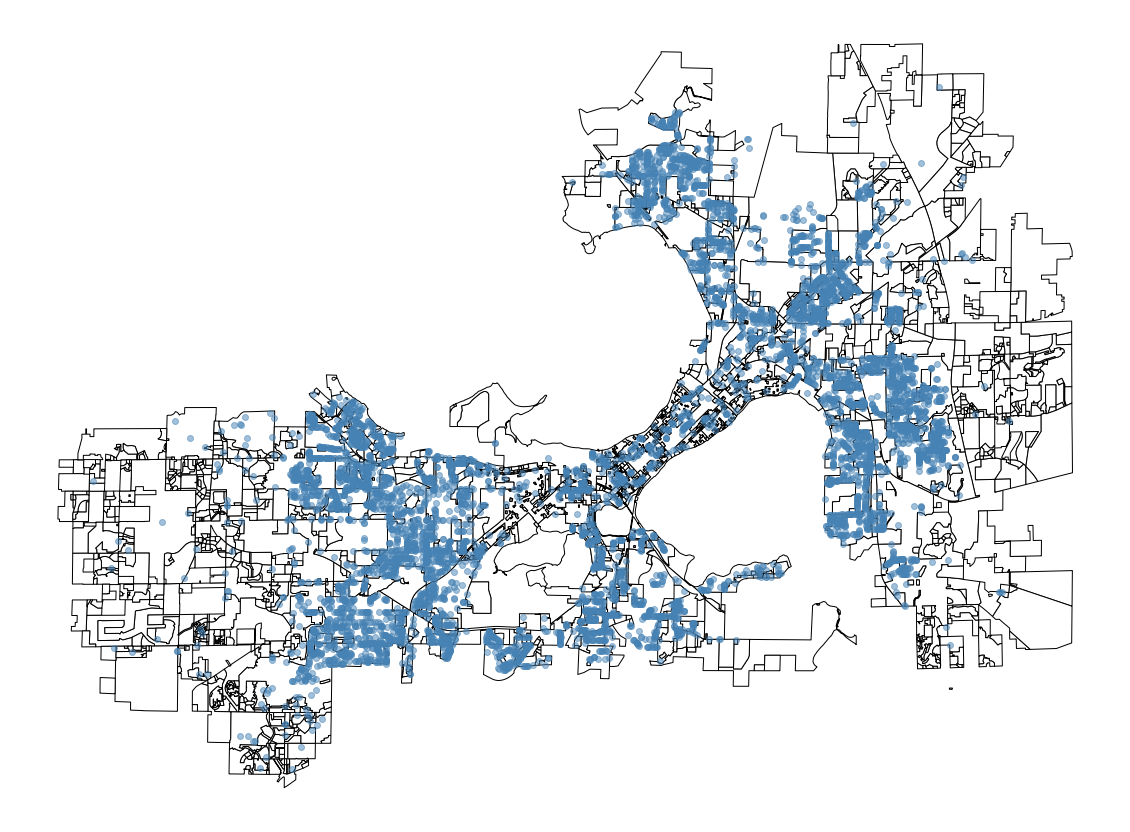

In [7]:
fig,ax = plt.subplots(figsize=(20,20))
ms.plot(color = "white",edgecolor = "black",ax=ax)
ax.scatter(x,y,color = "steelblue",alpha = 0.5)
ax.axis("off")

In [8]:
yedge = ax.get_ylim()
xedge = ax.get_xlim()

In [9]:
yedge,xedge

((42.98945303094492, 43.180714182328316),
 (-89.58776742567994, -89.23054231969978))

In [4]:
wmb = geopandas.read_file("zip://Water_Main_Breaks-shp.zip")
print(len(wmb["OBJECTID"].unique()))
print(len(wmb["OBJECTID"]))

6993
6993


(-89.58776742567994, -89.23054231969978, 42.98945303094492, 43.180714182328316)

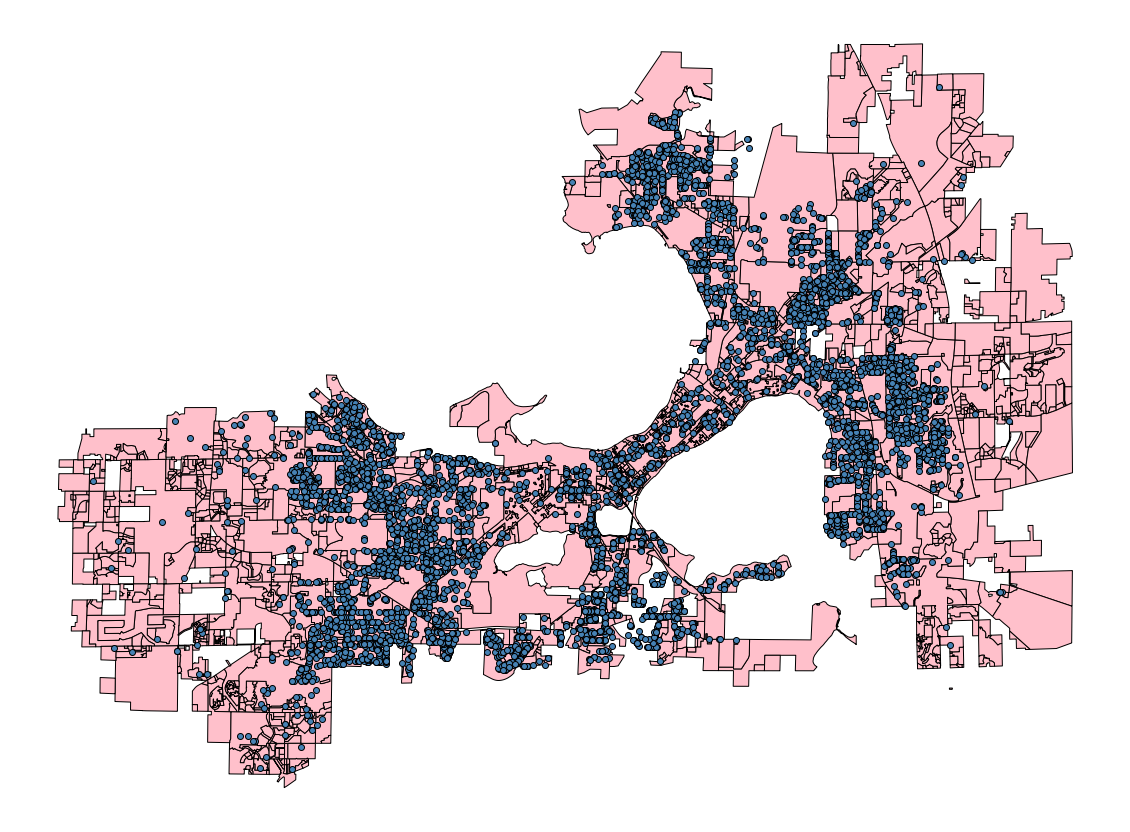

In [21]:
fig,ax = plt.subplots(figsize=(20,20))
ms.plot(color = "pink",edgecolor = "black",ax=ax)
wmb.plot(color = "steelblue",edgecolor = "black",ax=ax)
ax.axis("off")

In [5]:
first_decade_v2=geopandas.read_file("zip://Water_Main_Breaks-shp.zip")
# Get names of indexes for which column Age has value 30
indexNames = first_decade_v2[first_decade_v2['break_year']>=1980].index
# Delete these row indexes from dataFrame
first_decade_v2.drop(indexNames , inplace=True)
first_decade_v2

OBJECTID  Cell_rotat  mslink  break_num  pipe_mslin pipe_type  \
4672      6226   89.602382  6634.0        NaN     18161.0      MAIN   
4673      6227   89.602117  6635.0        NaN     12950.0      MAIN   
4674      6228   89.602117  6636.0        NaN     12949.0      MAIN   
4781      6375   30.478264  6908.0      135.0     12532.0      MAIN   
4783      6377  359.603427  6925.0      152.0     20842.0      MAIN   
4853      6858         NaN  2012.0       19.0         NaN      MAIN   
4854      7253         NaN  2012.0       20.0         NaN      MAIN   
4855      7254         NaN  2012.0       21.0         NaN      MAIN   

      break_date  house_num street_dir street_nam  ...  created_da last_edite  \
4672  1970-01-01        NaN       None       None  ...  1970-01-01       None   
4673  1970-01-01        NaN       None       None  ...  1970-01-01       None   
4674  1970-01-01        NaN       None       None  ...  1970-01-01       None   
4781  1970-01-01        NaN       None       None  ...  1970-01-01       None   
4783  1970-01-01        NaN       None       None  ...  1970-01-01       None   
4853  1970-01-01        NaN       None       None  ...  1970-01-01       None   
4854  1970-01-01        NaN       None       None  ...  1970-01-01       None   
4855  1970-01-01        NaN       None       None  ...  1970-01-01      WUPTB   

      last_edi_1 BreakType BreakTypeO StreetSegm  CWWOID  CWWOClosed  \
4672  1970-01-01      None       None       4965    None  1970-01-01   
4673  1970-01-01      None       None       2809    None  1970-01-01   
4674  1970-01-01      None       None       2809    None  1970-01-01   
4781  1970-01-01      None       None       2610    None  1970-01-01   
4783  1970-01-01      None       None       5751    None  1970-01-01   
4853  1970-01-01      None       None       6952    None  1970-01-01   
4854  1970-01-01      None       None       5569    None  1970-01-01   
4855  2019-02-25      None       None       1808    None  1970-01-01   

      TotalHours                    geometry  
4672         NaN  POINT (-89.39822 43.07403)  
4673         NaN  POINT (-89.33753 43.10018)  
4674         NaN  POINT (-89.33753 43.09989)  
4781         NaN  POINT (-89.32397 43.08879)  
4783         NaN  POINT (-89.44744 43.06859)  
4853         NaN  POINT (-89.47896 43.03379)  
4854         NaN  POINT (-89.47310 43.07105)  
4855         NaN  POINT (-89.30366 43.11014)  

[8 rows x 45 columns]

In [24]:
print(first_decade_v2["break_year"])

123     1980.0
127     1980.0
150     1980.0
155     1980.0
162     1980.0
         ...  
4781     135.0
4783     152.0
4853       NaN
4854       NaN
4855       NaN
Name: break_year, Length: 161, dtype: float64


In [6]:
last_decade_v2=geopandas.read_file("zip://Water_Main_Breaks-shp.zip")
# Get names of indexes for which column Age has value 30
indexNames = last_decade_v2[last_decade_v2['break_year']<2010].index
# Delete these row indexes from dataFrame
last_decade_v2.drop(indexNames , inplace=True)
last_decade_v2

OBJECTID  Cell_rotat  mslink  break_num  pipe_mslin     pipe_type  \
4584      6115  359.602700  6523.0        1.0     14743.0          MAIN   
4585      6116   89.602230  6524.0        2.0     16615.0          MAIN   
4586      6119  359.602856  6527.0        5.0     13995.0          MAIN   
4587      6120  359.602959  6528.0        6.0     16143.0          MAIN   
4588      6121   29.845378  6529.0        7.0     20993.0          MAIN   
...        ...         ...     ...        ...         ...           ...   
6988     59449         NaN     NaN    71678.0         NaN  SERVICE (WU)   
6989     59450         NaN     NaN    71670.0         NaN          MAIN   
6990     59451         NaN     NaN    71715.0         NaN          MAIN   
6991     59452         NaN     NaN    71789.0         NaN          MAIN   
6992     59453         NaN     NaN    71879.0         NaN          MAIN   

      break_date  house_num street_dir street_nam  ...  created_da last_edite  \
4584  2010-01-01     4310.0       None    Tomscot  ...  1970-01-01      WUPTB   
4585  2010-01-03     3902.0          N    Sherman  ...  1970-01-01      WUPTB   
4586  2010-01-05     4718.0       None      Maher  ...  1970-01-01      WUPTB   
4587  2010-01-06     1802.0       None   Sheridan  ...  1970-01-01      WUPTB   
4588  2010-01-07        NaN       None  Forsythia  ...  1970-01-01       None   
...          ...        ...        ...        ...  ...         ...        ...   
6988  1970-01-01        NaN       None       None  ...  2020-09-22      WUJAG   
6989  1970-01-01        NaN       None       None  ...  2020-09-22      WUJAG   
6990  1970-01-01        NaN       None       None  ...  2020-09-22      WUJAG   
6991  1970-01-01        NaN       None       None  ...  2020-09-22      WUJAG   
6992  1970-01-01        NaN       None       None  ...  2020-09-25      WUJAG   

      last_edi_1 BreakType BreakTypeO StreetSegm  CWWOID  CWWOClosed  \
4584  2018-02-15      None       None       1899    None  1970-01-01   
4585  2018-02-15      None       None       1640    None  1970-01-01   
4586  2018-02-15      None       None       3544    None  1970-01-01   
4587  2018-02-15      None       None       1654    None  1970-01-01   
4588  1970-01-01      None       None       5528    None  1970-01-01   
...          ...       ...        ...        ...     ...         ...   
6988  2020-09-22      None       None       None    None  1970-01-01   
6989  2020-09-22      None       None       None    None  1970-01-01   
6990  2020-09-22      None       None       None    None  1970-01-01   
6991  2020-09-22      None       None       None    None  1970-01-01   
6992  2020-09-25      None       None       None    None  1970-01-01   

      TotalHours                    geometry  
4584         1.0  POINT (-89.31162 43.13703)  
4585         2.1  POINT (-89.36337 43.13523)  
4586         1.5  POINT (-89.31296 43.07211)  
4587         1.5  POINT (-89.36371 43.11938)  
4588         1.5  POINT (-89.47930 43.07037)  
...          ...                         ...  
6988         NaN  POINT (-89.47167 43.02902)  
6989         NaN  POINT (-89.44371 43.04018)  
6990         NaN  POINT (-89.39218 43.05226)  
6991         NaN  POINT (-89.39753 43.05303)  
6992         NaN  POINT (-89.40135 43.02809)  

[2403 rows x 45 columns]

4584    2010.0
4585    2010.0
4586    2010.0
4587    2010.0
4588    2010.0
         ...  
6988    2020.0
6989    2020.0
6990    2020.0
6991    2020.0
6992    2020.0
Name: break_year, Length: 2403, dtype: float64

In [7]:
second_decade_v2=geopandas.read_file("zip://Water_Main_Breaks-shp.zip")
# Get names of indexes for which column Age has value 30
indexNames = second_decade_v2[(second_decade_v2['break_year']<1980) | (second_decade_v2['break_year']>=1990)].index
# Delete these row indexes from dataFrame
second_decade_v2.drop(indexNames , inplace=True)
second_decade_v2

OBJECTID  Cell_rotat  mslink  break_num  pipe_mslin pipe_type  \
116        150  359.602725   400.0        0.0     14746.0      MAIN   
117        151  359.602726   401.0        0.0     14746.0      MAIN   
118        152  359.602731   402.0        0.0     14746.0      MAIN   
119        153  359.602730   403.0        0.0     14746.0      MAIN   
120        154  359.602735   404.0        0.0     15283.0      MAIN   
...        ...         ...     ...        ...         ...       ...   
4673      6227   89.602117  6635.0        NaN     12950.0      MAIN   
4674      6228   89.602117  6636.0        NaN     12949.0      MAIN   
4853      6858         NaN  2012.0       19.0         NaN      MAIN   
4854      7253         NaN  2012.0       20.0         NaN      MAIN   
4855      7254         NaN  2012.0       21.0         NaN      MAIN   

      break_date  house_num street_dir street_nam  ...  created_da last_edite  \
116   1970-01-01        NaN       None       None  ...  1970-01-01       None   
117   1970-01-01        NaN       None       None  ...  1970-01-01       None   
118   1970-01-01        NaN       None       None  ...  1970-01-01       None   
119   1970-01-01        NaN       None       None  ...  1970-01-01       None   
120   1970-01-01        NaN       None       None  ...  1970-01-01       None   
...          ...        ...        ...        ...  ...         ...        ...   
4673  1970-01-01        NaN       None       None  ...  1970-01-01       None   
4674  1970-01-01        NaN       None       None  ...  1970-01-01       None   
4853  1970-01-01        NaN       None       None  ...  1970-01-01       None   
4854  1970-01-01        NaN       None       None  ...  1970-01-01       None   
4855  1970-01-01        NaN       None       None  ...  1970-01-01      WUPTB   

      last_edi_1 BreakType BreakTypeO StreetSegm  CWWOID  CWWOClosed  \
116   1970-01-01      None       None       1748    None  1970-01-01   
117   1970-01-01      None       None       1748    None  1970-01-01   
118   1970-01-01      None       None       1748    None  1970-01-01   
119   1970-01-01      None       None       1748    None  1970-01-01   
120   1970-01-01      None       None       1747    None  1970-01-01   
...          ...       ...        ...        ...     ...         ...   
4673  1970-01-01      None       None       2809    None  1970-01-01   
4674  1970-01-01      None       None       2809    None  1970-01-01   
4853  1970-01-01      None       None       6952    None  1970-01-01   
4854  1970-01-01      None       None       5569    None  1970-01-01   
4855  2019-02-25      None       None       1808    None  1970-01-01   

      TotalHours                    geometry  
116          NaN  POINT (-89.31208 43.12724)  
117          NaN  POINT (-89.31228 43.12711)  
118          NaN  POINT (-89.31306 43.12656)  
119          NaN  POINT (-89.31289 43.12668)  
120          NaN  POINT (-89.31388 43.12600)  
...          ...                         ...  
4673         NaN  POINT (-89.33753 43.10018)  
4674         NaN  POINT (-89.33753 43.09989)  
4853         NaN  POINT (-89.47896 43.03379)  
4854         NaN  POINT (-89.47310 43.07105)  
4855         NaN  POINT (-89.30366 43.11014)  

[1458 rows x 45 columns]

In [8]:
third_decade_v2=geopandas.read_file("zip://Water_Main_Breaks-shp.zip")
# Get names of indexes for which column Age has value 30
indexNames = third_decade_v2[(third_decade_v2['break_year']<1990) | (third_decade_v2['break_year']>=2000)].index
# Delete these row indexes from dataFrame
third_decade_v2.drop(indexNames , inplace=True)
third_decade_v2

OBJECTID  Cell_rotat  mslink  break_num  pipe_mslin pipe_type  \
608        874   89.602098  1167.0       25.0     15467.0      MAIN   
609        875   29.602414  1168.0       27.0     14085.0      MAIN   
610        876  359.603513  1169.0       28.0     21271.0      MAIN   
611        877  334.603686  1170.0       29.0      2420.0      MAIN   
612        880   89.601976  1173.0       32.0     11227.0      MAIN   
...        ...         ...     ...        ...         ...       ...   
4673      6227   89.602117  6635.0        NaN     12950.0      MAIN   
4674      6228   89.602117  6636.0        NaN     12949.0      MAIN   
4853      6858         NaN  2012.0       19.0         NaN      MAIN   
4854      7253         NaN  2012.0       20.0         NaN      MAIN   
4855      7254         NaN  2012.0       21.0         NaN      MAIN   

      break_date  house_num street_dir street_nam  ...  created_da last_edite  \
608   1970-01-01        NaN       None       None  ...  1970-01-01      WUPTB   
609   1970-01-01        NaN       None       None  ...  1970-01-01      WUPTB   
610   1970-01-01        NaN       None       None  ...  1970-01-01      WUPTB   
611   1970-01-01        NaN       None       None  ...  1970-01-01       None   
612   1970-01-01        NaN       None       None  ...  1970-01-01       None   
...          ...        ...        ...        ...  ...         ...        ...   
4673  1970-01-01        NaN       None       None  ...  1970-01-01       None   
4674  1970-01-01        NaN       None       None  ...  1970-01-01       None   
4853  1970-01-01        NaN       None       None  ...  1970-01-01       None   
4854  1970-01-01        NaN       None       None  ...  1970-01-01       None   
4855  1970-01-01        NaN       None       None  ...  1970-01-01      WUPTB   

      last_edi_1 BreakType BreakTypeO StreetSegm  CWWOID  CWWOClosed  \
608   2019-02-25      None       None       2217    None  1970-01-01   
609   2019-02-25      None       None       3491    None  1970-01-01   
610   2019-02-25      None       None       6900    None  1970-01-01   
611   1970-01-01      None       None       1141    None  1970-01-01   
612   1970-01-01      None       None       3794    None  1970-01-01   
...          ...       ...        ...        ...     ...         ...   
4673  1970-01-01      None       None       2809    None  1970-01-01   
4674  1970-01-01      None       None       2809    None  1970-01-01   
4853  1970-01-01      None       None       6952    None  1970-01-01   
4854  1970-01-01      None       None       5569    None  1970-01-01   
4855  2019-02-25      None       None       1808    None  1970-01-01   

      TotalHours                    geometry  
608          NaN  POINT (-89.33322 43.12727)  
609          NaN  POINT (-89.31077 43.09730)  
610          NaN  POINT (-89.45969 43.05349)  
611          NaN  POINT (-89.48083 43.02934)  
612          NaN  POINT (-89.30555 43.08379)  
...          ...                         ...  
4673         NaN  POINT (-89.33753 43.10018)  
4674         NaN  POINT (-89.33753 43.09989)  
4853         NaN  POINT (-89.47896 43.03379)  
4854         NaN  POINT (-89.47310 43.07105)  
4855         NaN  POINT (-89.30366 43.11014)  

[1397 rows x 45 columns]

In [9]:
fourth_decade_v2=geopandas.read_file("zip://Water_Main_Breaks-shp.zip")
# Get names of indexes for which column Age has value 30
indexNames = fourth_decade_v2[(fourth_decade_v2['break_year']<2000) | (fourth_decade_v2['break_year']>=2010)].index
# Delete these row indexes from dataFrame
fourth_decade_v2.drop(indexNames , inplace=True)
fourth_decade_v2

OBJECTID  Cell_rotat  mslink  break_num  pipe_mslin pipe_type  \
0            1  359.603239     1.0      225.0     18715.0      MAIN   
1            3  359.602939    27.0      226.0     15257.0      MAIN   
2            4  359.602863    28.0      227.0     12532.0      MAIN   
3            5   44.602085    30.0      228.0     11178.0      MAIN   
4            7  359.602838    32.0      230.0     12647.0      MAIN   
...        ...         ...     ...        ...         ...       ...   
4774      6366   63.128911  6789.0       17.0      2317.0      MAIN   
4788      6382   89.602226  6944.0      171.0     15196.0      MAIN   
4853      6858         NaN  2012.0       19.0         NaN      MAIN   
4854      7253         NaN  2012.0       20.0         NaN      MAIN   
4855      7254         NaN  2012.0       21.0         NaN      MAIN   

      break_date  house_num street_dir  street_nam  ...  created_da  \
0     2007-11-01      918.0       None      Regent  ...  1970-01-01   
1     2007-11-02     2255.0       None      Myrtle  ...  1970-01-01   
2     2007-11-05     3701.0       None    Margaret  ...  1970-01-01   
3     2007-11-07      533.0       None  Shady Wood  ...  1970-01-01   
4     2007-11-09     3906.0       None    Margaret  ...  1970-01-01   
...          ...        ...        ...         ...  ...         ...   
4774  2008-01-09     5718.0       None      Monona  ...  1970-01-01   
4788  2001-07-16        NaN       None        None  ...  1970-01-01   
4853  1970-01-01        NaN       None        None  ...  1970-01-01   
4854  1970-01-01        NaN       None        None  ...  1970-01-01   
4855  1970-01-01        NaN       None        None  ...  1970-01-01   

     last_edite  last_edi_1 BreakType BreakTypeO StreetSegm  CWWOID  \
0          None  1970-01-01      None       None       4996    None   
1         WUPTB  2018-02-15      None       None       2031    None   
2         WUPTB  2018-02-15      None       None       2610    None   
3         WUPTB  2018-02-15      None       None       3299    None   
4         WUPTB  2018-02-15      None       None       3055    None   
...         ...         ...       ...        ...        ...     ...   
4774      WUPTB  2018-02-15      None       None       1087    None   
4788       None  1970-01-01      None       None       2110    None   
4853       None  1970-01-01      None       None       6952    None   
4854       None  1970-01-01      None       None       5569    None   
4855      WUPTB  2019-02-25      None       None       1808    None   

      CWWOClosed  TotalHours                    geometry  
0     1970-01-01         NaN  POINT (-89.40211 43.06769)  
1     1970-01-01         NaN  POINT (-89.35369 43.10999)  
2     1970-01-01         NaN  POINT (-89.32397 43.08879)  
3     1970-01-01         NaN  POINT (-89.29538 43.09066)  
4     1970-01-01         NaN  POINT (-89.31824 43.08942)  
...          ...         ...                         ...  
4774  1970-01-01         2.0  POINT (-89.44624 43.02986)  
4788  1970-01-01         1.5  POINT (-89.36261 43.11430)  
4853  1970-01-01         NaN  POINT (-89.47896 43.03379)  
4854  1970-01-01         NaN  POINT (-89.47310 43.07105)  
4855  1970-01-01         NaN  POINT (-89.30366 43.11014)  

[1751 rows x 45 columns]

(-89.58776742567994, -89.23054231969978, 42.98945303094492, 43.180714182328316)

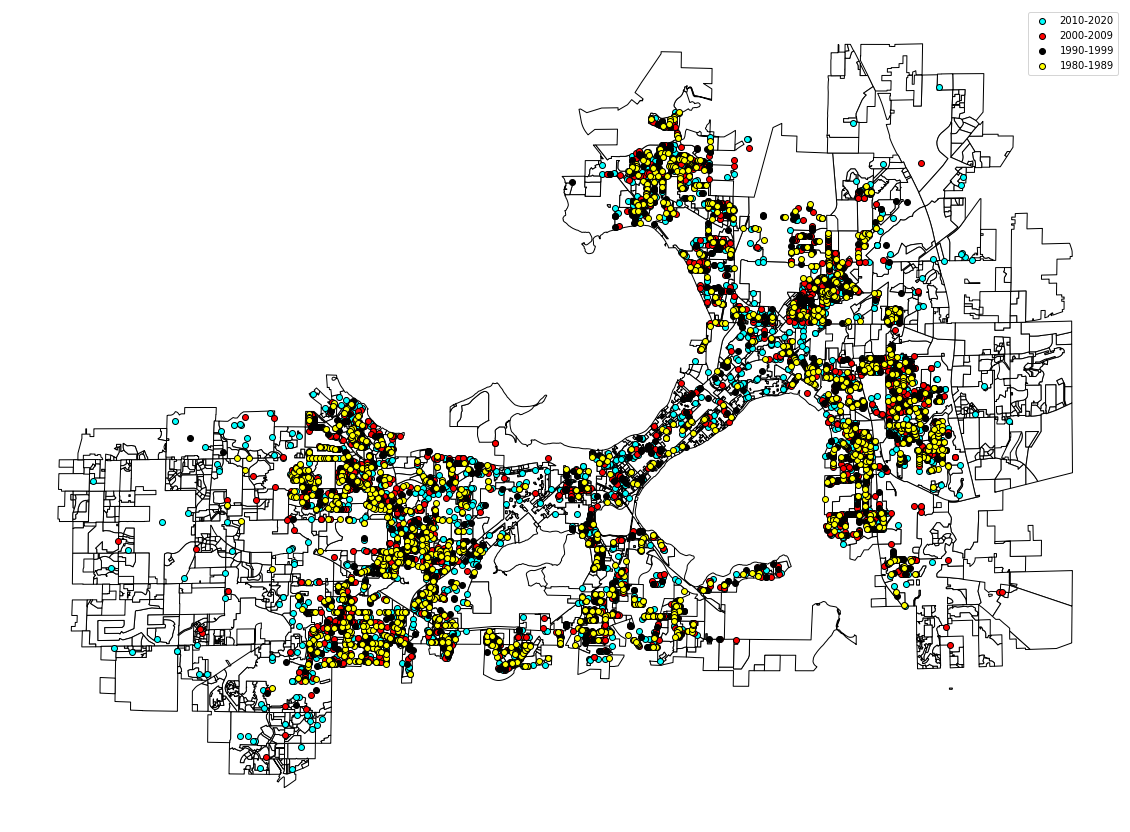

In [12]:
fig,ax = plt.subplots(figsize=(20,20))
ms.plot(color = "white",edgecolor = "black",ax=ax)

last_decade_v2.plot(color = "cyan",edgecolor = "black",ax=ax)
fourth_decade_v2.plot(color = "red",edgecolor = "black",ax=ax)
third_decade_v2.plot(color = "black",edgecolor = "black",ax=ax)
second_decade_v2.plot(color = "yellow",edgecolor = "black",ax=ax)
ax.legend(["2010-2020","2000-2009","1990-1999","1980-1989"])
ax.axis("off")

(-89.58776742567994, -89.23054231969978, 42.98945303094492, 43.180714182328316)

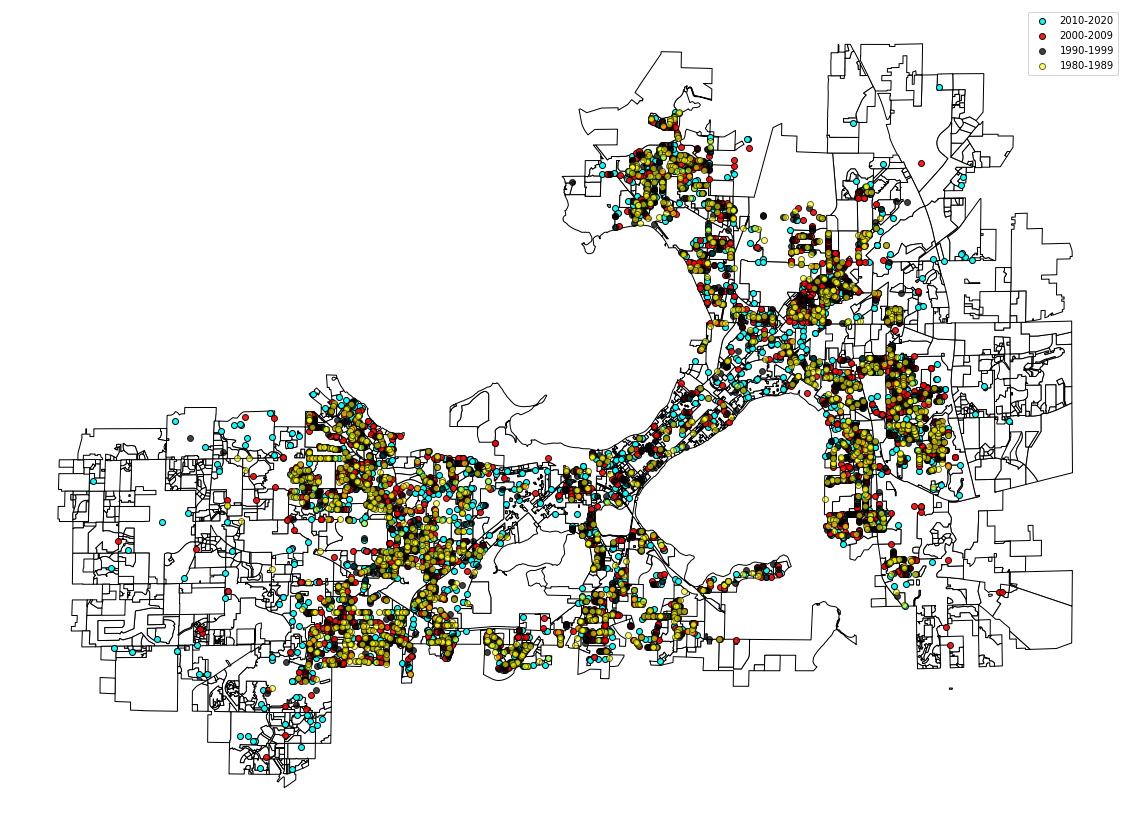

In [63]:
fig,ax = plt.subplots(figsize=(20,20))
ms.plot(color = "white",edgecolor = "black",ax=ax)

last_decade_v2.plot(color = "cyan",edgecolor = "black",ax=ax)
fourth_decade_v2.plot(color = "red",edgecolor = "black",ax=ax,alpha=0.9)
third_decade_v2.plot(color = "black",edgecolor = "black",ax=ax,alpha=0.75)
second_decade_v2.plot(color = "yellow",edgecolor = "black",ax=ax,alpha=0.6)
ax.legend(["2010-2020","2000-2009","1990-1999","1980-1989"])
ax.axis("off")

(-89.58776742567994, -89.23054231969978, 42.98945303094492, 43.180714182328316)

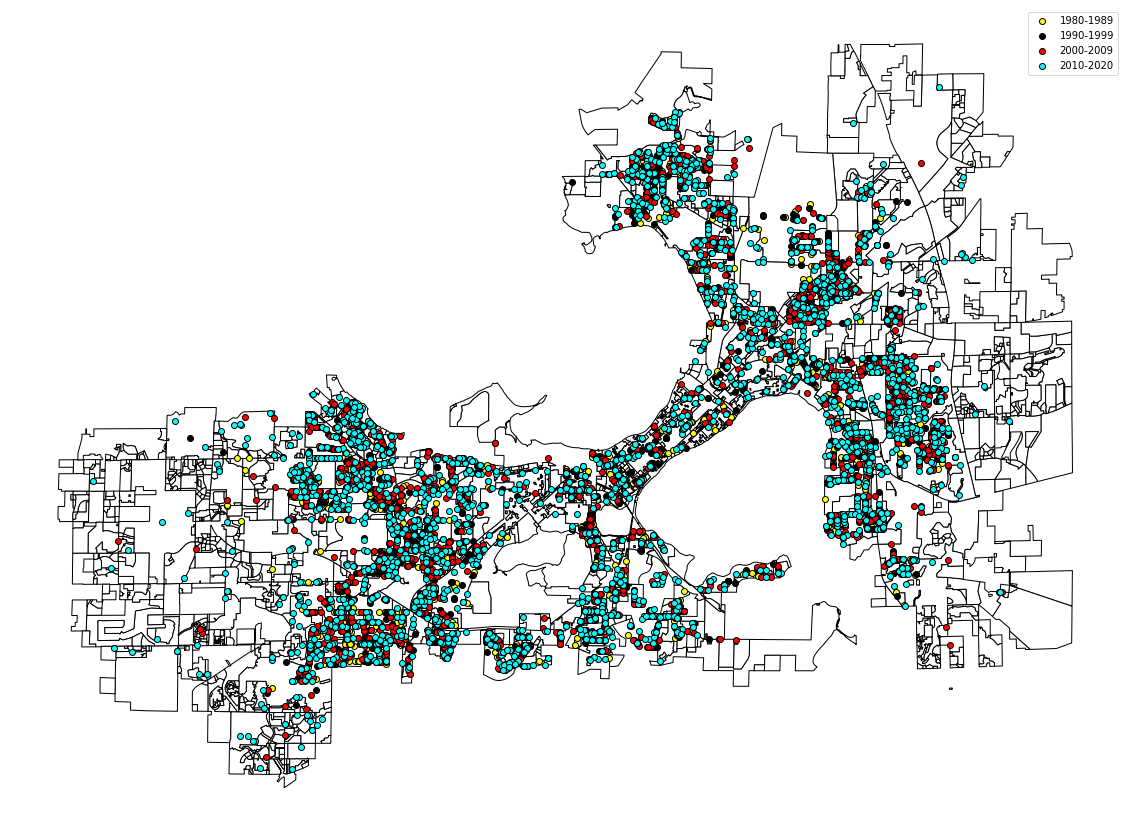

In [55]:
fig,ax = plt.subplots(figsize=(20,20))
ms.plot(color = "white",edgecolor = "black",ax=ax)
second_decade_v2.plot(color = "yellow",edgecolor = "black",ax=ax)
third_decade_v2.plot(color = "black",edgecolor = "black",ax=ax)
fourth_decade_v2.plot(color = "red",edgecolor = "black",ax=ax)
last_decade_v2.plot(color = "cyan",edgecolor = "black",ax=ax)
ax.legend(["1980-1989","1990-1999","2000-2009","2010-2020"])
ax.axis("off")

(-89.58776742567994,
 -89.23054231969978,
 42.989453030944915,
 43.180714182328316)

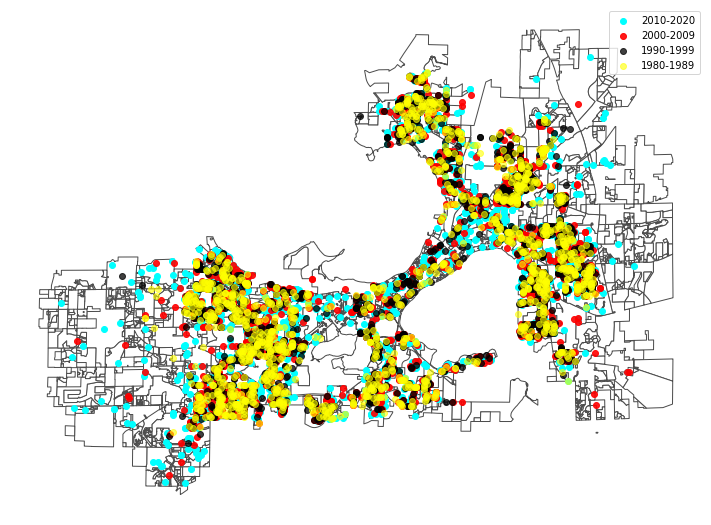

In [17]:
### Week 6

fig,ax = plt.subplots(figsize=(12.5,12.5))
ms.plot(color = "white",edgecolor = "0.3",ax=ax)
last_decade_v2.plot(color = "cyan",ax=ax)
fourth_decade_v2.plot(color = "red",ax=ax,alpha=0.9)
third_decade_v2.plot(color = "black",ax=ax,alpha=0.75)
second_decade_v2.plot(color = "yellow",ax=ax,alpha=0.6)
ax.legend(["2010-2020","2000-2009","1990-1999","1980-1989"])
ax.axis("off")

In [ ]:
##Failed Attempts Below

In [22]:
first_decade= geopandas.read_file("zip://Water_Main_Breaks-shp.zip")

to_be_deleted=[]
count=0
for i in first_decade["break_year"]:

    if(i>1980):
        to_be_deleted.append(count)
    count+=1
first_decade=first_decade.drop(to_be_deleted,axis=0)
first_decade


OBJECTID  Cell_rotat  mslink  break_num  pipe_mslin pipe_type  \
123        158  359.602748   408.0        0.0     16044.0      MAIN   
127        164  359.602744   414.0        0.0     15513.0      MAIN   
150        187  359.602874   437.0        0.0     11967.0      MAIN   
155        193  359.602858   443.0        0.0     12187.0      MAIN   
162        200  359.602874   450.0        0.0     12102.0      MAIN   
...        ...         ...     ...        ...         ...       ...   
4781      6375   30.478264  6908.0      135.0     12532.0      MAIN   
4783      6377  359.603427  6925.0      152.0     20842.0      MAIN   
4853      6858         NaN  2012.0       19.0         NaN      MAIN   
4854      7253         NaN  2012.0       20.0         NaN      MAIN   
4855      7254         NaN  2012.0       21.0         NaN      MAIN   

      break_date  house_num street_dir street_nam  ...  created_da last_edite  \
123   1970-01-01        NaN       None       None  ...  1970-01-01       None   
127   1970-01-01        NaN       None       None  ...  1970-01-01       None   
150   1970-01-01        NaN       None       None  ...  1970-01-01       None   
155   1970-01-01        NaN       None       None  ...  1970-01-01       None   
162   1970-01-01        NaN       None       None  ...  1970-01-01       None   
...          ...        ...        ...        ...  ...         ...        ...   
4781  1970-01-01        NaN       None       None  ...  1970-01-01       None   
4783  1970-01-01        NaN       None       None  ...  1970-01-01       None   
4853  1970-01-01        NaN       None       None  ...  1970-01-01       None   
4854  1970-01-01        NaN       None       None  ...  1970-01-01       None   
4855  1970-01-01        NaN       None       None  ...  1970-01-01      WUPTB   

      last_edi_1 BreakType BreakTypeO StreetSegm  CWWOID  CWWOClosed  \
123   1970-01-01      None       None       1674    None  1970-01-01   
127   1970-01-01      None       None       1856    None  1970-01-01   
150   1970-01-01      None       None       4230    None  1970-01-01   
155   1970-01-01      None       None       4068    None  1970-01-01   
162   1970-01-01      None       None       4034    None  1970-01-01   
...          ...       ...        ...        ...     ...         ...   
4781  1970-01-01      None       None       2610    None  1970-01-01   
4783  1970-01-01      None       None       5751    None  1970-01-01   
4853  1970-01-01      None       None       6952    None  1970-01-01   
4854  1970-01-01      None       None       5569    None  1970-01-01   
4855  2019-02-25      None       None       1808    None  1970-01-01   

      TotalHours                    geometry  
123          NaN  POINT (-89.31529 43.12309)  
127          NaN  POINT (-89.30909 43.11369)  
150          NaN  POINT (-89.30552 43.05075)  
155          NaN  POINT (-89.30752 43.06137)  
162          NaN  POINT (-89.31164 43.06188)  
...          ...                         ...  
4781         NaN  POINT (-89.32397 43.08879)  
4783         NaN  POINT (-89.44744 43.06859)  
4853         NaN  POINT (-89.47896 43.03379)  
4854         NaN  POINT (-89.47310 43.07105)  
4855         NaN  POINT (-89.30366 43.11014)  

[161 rows x 45 columns]

In [36]:
last_decade= geopandas.read_file("zip://Water_Main_Breaks-shp.zip")

to_be_deleted=[]
count=0
for i in last_decade["break_year"]:  
    if(i<2010):
        to_be_deleted.append(count)
    count+=1
last_decade=last_decade.drop(to_be_deleted,axis=0)
last_decade

OBJECTID  Cell_rotat  mslink  break_num  pipe_mslin     pipe_type  \
4584      6115  359.602700  6523.0        1.0     14743.0          MAIN   
4585      6116   89.602230  6524.0        2.0     16615.0          MAIN   
4586      6119  359.602856  6527.0        5.0     13995.0          MAIN   
4587      6120  359.602959  6528.0        6.0     16143.0          MAIN   
4588      6121   29.845378  6529.0        7.0     20993.0          MAIN   
...        ...         ...     ...        ...         ...           ...   
6988     59449         NaN     NaN    71678.0         NaN  SERVICE (WU)   
6989     59450         NaN     NaN    71670.0         NaN          MAIN   
6990     59451         NaN     NaN    71715.0         NaN          MAIN   
6991     59452         NaN     NaN    71789.0         NaN          MAIN   
6992     59453         NaN     NaN    71879.0         NaN          MAIN   

      break_date  house_num street_dir street_nam  ...  created_da last_edite  \
4584  2010-01-01     4310.0       None    Tomscot  ...  1970-01-01      WUPTB   
4585  2010-01-03     3902.0          N    Sherman  ...  1970-01-01      WUPTB   
4586  2010-01-05     4718.0       None      Maher  ...  1970-01-01      WUPTB   
4587  2010-01-06     1802.0       None   Sheridan  ...  1970-01-01      WUPTB   
4588  2010-01-07        NaN       None  Forsythia  ...  1970-01-01       None   
...          ...        ...        ...        ...  ...         ...        ...   
6988  1970-01-01        NaN       None       None  ...  2020-09-22      WUJAG   
6989  1970-01-01        NaN       None       None  ...  2020-09-22      WUJAG   
6990  1970-01-01        NaN       None       None  ...  2020-09-22      WUJAG   
6991  1970-01-01        NaN       None       None  ...  2020-09-22      WUJAG   
6992  1970-01-01        NaN       None       None  ...  2020-09-25      WUJAG   

      last_edi_1 BreakType BreakTypeO StreetSegm  CWWOID  CWWOClosed  \
4584  2018-02-15      None       None       1899    None  1970-01-01   
4585  2018-02-15      None       None       1640    None  1970-01-01   
4586  2018-02-15      None       None       3544    None  1970-01-01   
4587  2018-02-15      None       None       1654    None  1970-01-01   
4588  1970-01-01      None       None       5528    None  1970-01-01   
...          ...       ...        ...        ...     ...         ...   
6988  2020-09-22      None       None       None    None  1970-01-01   
6989  2020-09-22      None       None       None    None  1970-01-01   
6990  2020-09-22      None       None       None    None  1970-01-01   
6991  2020-09-22      None       None       None    None  1970-01-01   
6992  2020-09-25      None       None       None    None  1970-01-01   

      TotalHours                    geometry  
4584         1.0  POINT (-89.31162 43.13703)  
4585         2.1  POINT (-89.36337 43.13523)  
4586         1.5  POINT (-89.31296 43.07211)  
4587         1.5  POINT (-89.36371 43.11938)  
4588         1.5  POINT (-89.47930 43.07037)  
...          ...                         ...  
6988         NaN  POINT (-89.47167 43.02902)  
6989         NaN  POINT (-89.44371 43.04018)  
6990         NaN  POINT (-89.39218 43.05226)  
6991         NaN  POINT (-89.39753 43.05303)  
6992         NaN  POINT (-89.40135 43.02809)  

[2403 rows x 45 columns]

(-89.58776742567994, -89.23054231969978, 42.98945303094492, 43.180714182328316)

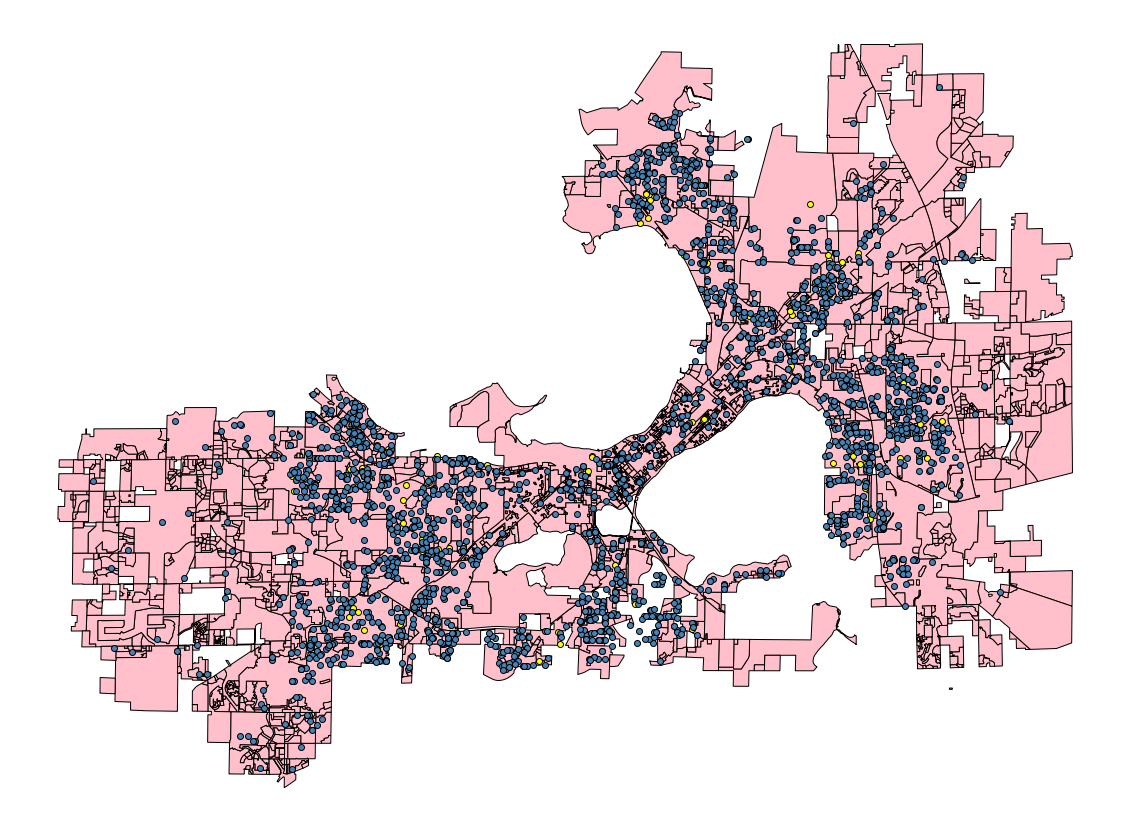

In [40]:
fig,ax = plt.subplots(figsize=(20,20))
ms.plot(color = "pink",edgecolor = "black",ax=ax)
first_decade.plot(color = "yellow",edgecolor = "black",ax=ax)
last_decade.plot(color = "steelblue",edgecolor = "black",ax=ax)
ax.axis("off")

In [ ]:
first_decade_filtered=first_decade
# Get names of indexes for which column Age has value 30
indexNames = first_decade_filtered[first_decade_filtered['pipe_depth']<2].index
# Delete these row indexes from dataFrame
first_decade_filtered=first_decade_filtered.drop(indexNames , inplace=True)
first_decade_filtered

In [ ]:
import math
last_decade_filtered=last_decade
#idx= list(range(0, len(first_decade_filtered.index)+1))
#first_decade_filtered=first_decade_filtered.reindex(index=idx)

to_be_deleted=[]
count=0

for i in last_decade_filtered["pipe_depth"]:
    
    if(depth<5.95 or depth>6.05):
        to_be_deleted.append(count)
    count+=1

last_decade_filtered=last_decade_filtered.drop(to_be_deleted,axis=0)
last_decade_filtered

In [ ]:
last_decade_filtered=first_decade
# Get names of indexes for which column Age has value 30
indexNames = first_decade_filtered[last_decade_filtered['break_year']>2010].index
# Delete these row indexes from dataFrame
last_decade_filtered=last_decade_filtered.drop(indexNames , inplace=True)
last_decade_filtered